<hr style="height:5px;border-width:0;color:MediumAquamarine;background-color:MediumAquamarine">

# Python Notebook for Stock Market Analysis

- [Materials Data](https://www.investing.com/indices/s-p-500-materials-historical-data) 
- [Utilities Data](https://www.investing.com/indices/s-p-500-utilities-historical-data) 
- [Real Estate Data](https://www.investing.com/indices/s-p-500-real-estate-historical-data) 

<hr style="height:5px;border-width:0;color:MediumAquamarine;background-color:MediumAquamarine">

In [1]:
import pandas as pd
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from scipy import stats

In [2]:
sp_materials = pd.read_csv(r"../Data/sp_materials_IG.csv")

In [50]:
sp_materials.head()

,Date,Price,Open,High,Low,Vol.,Change %
0,05/31/2023,471.02,473.78,474.90,469.18,142.97M,-1.12%
1,05/30/2023,476.37,479.17,479.32,472.87,80.34M,-0.59%
2,05/26/2023,479.21,479.30,482.37,477.26,70.83M,0.42%
3,05/25/2023,477.22,478.85,479.46,474.69,78.10M,-0.38%
4,05/24/2023,479.04,483.45,483.45,478.16,75.35M,-1.12%


In [8]:
len(sp_materials)

2620

In [3]:
sp_utilities = pd.read_csv(r"../Data/sp_utilities_IG.csv")
sp_utilities.head()

,Date,Price,Open,High,Low,Vol.,Change %
0,05/31/2023,327.97,325.31,329.35,323.00,182.05M,0.96%
1,05/30/2023,324.86,326.58,328.37,324.47,113.20M,-0.39%
2,05/26/2023,326.13,325.94,326.39,322.96,98.04M,-0.10%
3,05/25/2023,326.45,330.08,330.08,324.25,104.56M,-1.38%
4,05/24/2023,331.01,332.83,333.67,330.48,90.54M,-0.63%


In [4]:
sp_real_estate = pd.read_csv(r"../Data/sp_real_estate_IG.csv")
sp_real_estate.head()

,Date,Price,Open,High,Low,Vol.,Change %
0,05/31/2023,225.65,224.55,226.00,222.94,167.82M,0.68%
1,05/30/2023,224.13,225.06,227.10,223.74,61.39M,0.30%
2,05/26/2023,223.45,221.43,223.90,220.49,53.55M,1.18%
3,05/25/2023,220.85,221.39,222.48,219.31,68.33M,0.27%
4,05/24/2023,220.26,224.57,224.61,219.98,56.90M,-2.22%


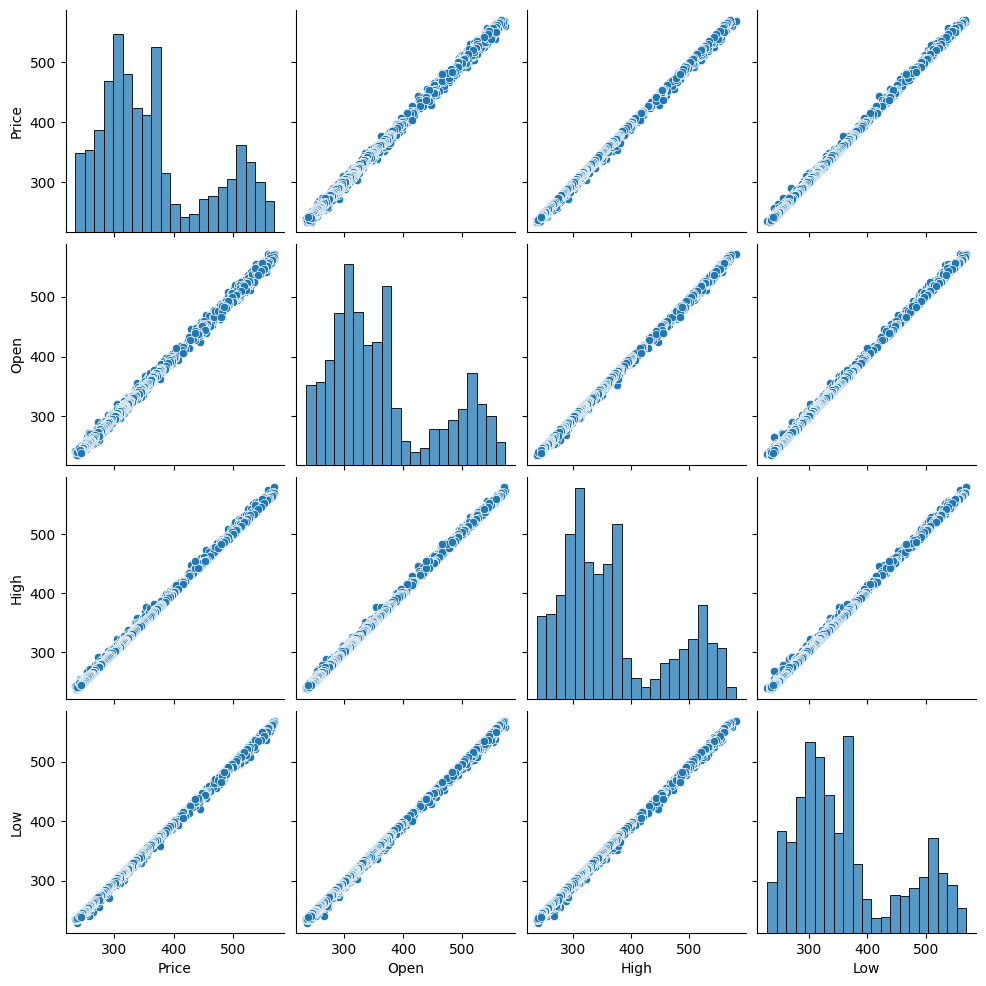

In [7]:
sns.pairplot(sp_materials)

In [8]:
num_bins = 20

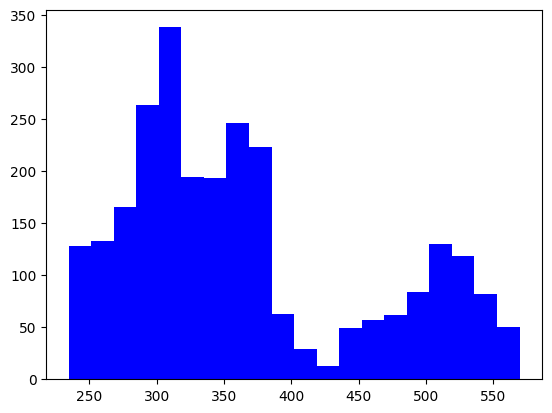

In [11]:
n, bins, patches = plt.hist(sp_materials['Price'], num_bins, facecolor='blue', alpha=1)

In [13]:
type(sp_materials)

pandas.core.frame.DataFrame

In [15]:
sp_materials.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2620 entries, 0 to 2619
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Date      2620 non-null   object 
 1   Price     2620 non-null   float64
 2   Open      2620 non-null   float64
 3   High      2620 non-null   float64
 4   Low       2620 non-null   float64
 5   Vol.      998 non-null    object 
 6   Change %  2620 non-null   object 
dtypes: float64(4), object(3)
memory usage: 143.4+ KB


In [16]:
sp_materials.isnull().sum()

Date           0
Price          0
Open           0
High           0
Low            0
Vol.        1622
Change %       0
dtype: int64

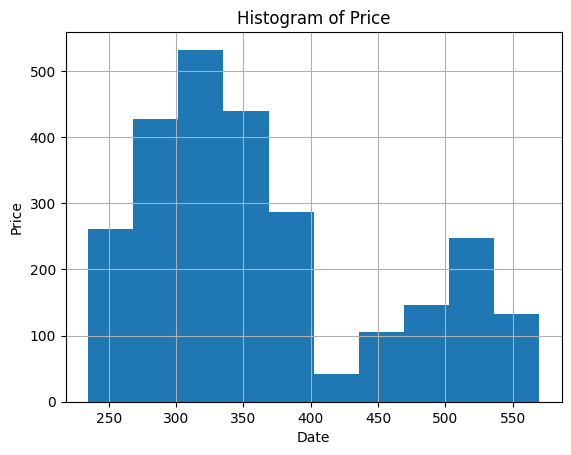

In [12]:
sp_materials['Price'].hist()
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Histogram of Price')
plt.show()

In [22]:
stats.ttest_rel(sp_materials['Price'], sp_materials['Open'])

TtestResult(statistic=0.006429147127272248, pvalue=0.994870807756831, df=2619)

In [20]:
sp_materials['Price'].corr(sp_materials['Open'])

0.999072685307522

In [5]:
sp_materials1 = sp_materials
sp_materials1.head()

,Date,Price,Open,High,Low,Vol.,Change %
0,05/31/2023,471.02,473.78,474.90,469.18,142.97M,-1.12%
1,05/30/2023,476.37,479.17,479.32,472.87,80.34M,-0.59%
2,05/26/2023,479.21,479.30,482.37,477.26,70.83M,0.42%
3,05/25/2023,477.22,478.85,479.46,474.69,78.10M,-0.38%
4,05/24/2023,479.04,483.45,483.45,478.16,75.35M,-1.12%


In [10]:
sp_utilities1 = sp_utilities

In [11]:
sp_real_estate1 = sp_real_estate

In [6]:
sp_materials1['Date'] = pd.to_datetime(sp_materials1['Date'], format='%m/%d/%Y')
#Convert the column containing the date values to a datetime format 

In [12]:
sp_materials1['Date'] = pd.to_datetime(sp_materials1['Date'], format='%m/%d/%Y')
sp_utilities1['Date'] = pd.to_datetime(sp_utilities1['Date'], format='%m/%d/%Y')
sp_real_estate1['Date'] = pd.to_datetime(sp_real_estate1['Date'], format='%m/%d/%Y')

In [13]:
sp_materials_f = sp_materials1[['Date', 'Price']]
sp_utilities_f = sp_utilities1[['Date', 'Price']]
sp_real_estate_f = sp_real_estate1[['Date','Price']]

In [14]:
sp_materials_f.head()

,Date,Price
0,2023-05-31,471.02
1,2023-05-30,476.37
2,2023-05-26,479.21
3,2023-05-25,477.22
4,2023-05-24,479.04


In [15]:
start_date = pd.to_datetime('2018-06-01')
end_date = pd.to_datetime('2023-05-30')

In [17]:
sp_materials_f = sp_materials_f[(sp_materials_f['Date'] >= start_date) & (sp_materials_f['Date'] <= end_date)]

In [18]:
sp_utilities_f = sp_utilities_f[(sp_utilities_f['Date'] >= start_date) & (sp_utilities_f['Date'] <= end_date)]

In [19]:
sp_real_estate_f = sp_real_estate_f[(sp_real_estate_f['Date'] >= start_date) & (sp_real_estate_f['Date'] <= end_date)]

In [20]:
sp_materials_f['year_month'] = sp_materials_f['Date'].dt.strftime('%Y-%m')

In [21]:
sp_materials_f.head(2)

,Date,Price,year_month
1,2023-05-30,476.37,2023-05
2,2023-05-26,479.21,2023-05


In [22]:
sp_utilities_f['year_month'] = sp_utilities_f['Date'].dt.strftime('%Y-%m')

In [24]:
sp_utilities_f.head(2)

,Date,Price,year_month
1,2023-05-30,324.86,2023-05
2,2023-05-26,326.13,2023-05


In [25]:
sp_real_estate_f['year_month'] = sp_real_estate_f['Date'].dt.strftime('%Y-%m')

In [26]:
sp_real_estate_f.head(2)

,Date,Price,year_month
1,2023-05-30,224.13,2023-05
2,2023-05-26,223.45,2023-05


In [31]:
sp_materials_f_with_index = sp_materials_f.set_index('Date')
#Fixes the problem stated below

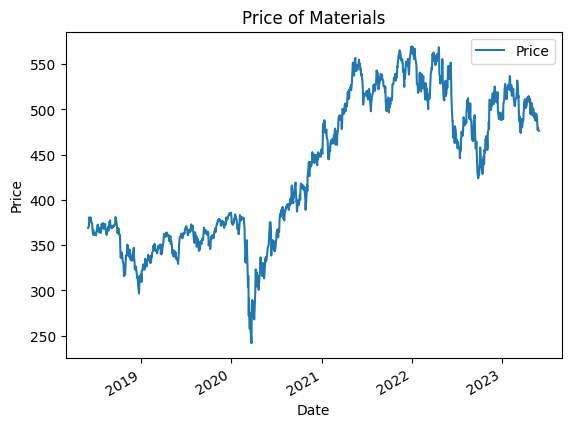

In [32]:
sp_materials_f_with_index['Price'].plot()
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Price of Materials')
plt.legend()
plt.show()
#Code removes date as a column and messes up the data, even if saved as another dataset

In [33]:
sp_real_estate_f_with_index = sp_real_estate_f.set_index('Date')

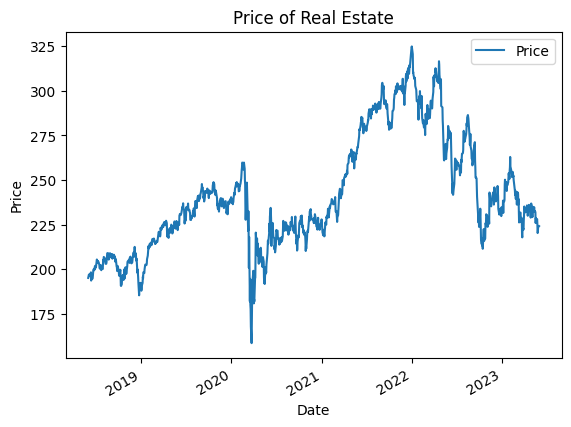

In [34]:
sp_real_estate_f_with_index['Price'].plot()
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Price of Real Estate')
plt.legend()
plt.show()

In [35]:
sp_utilities_f_with_index = sp_utilities_f.set_index('Date')

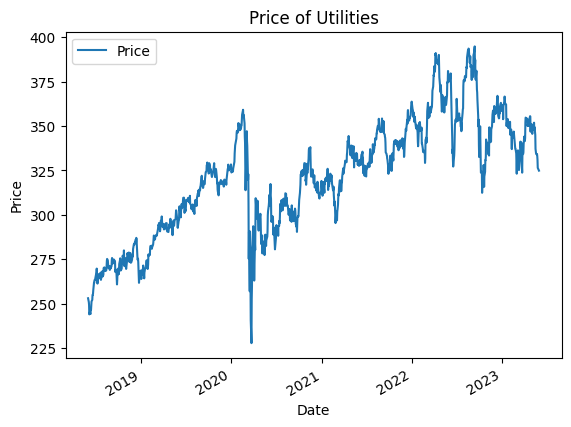

In [36]:
sp_utilities_f_with_index['Price'].plot()
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Price of Utilities')
plt.legend()
plt.show()

In [37]:
merger_1 = pd.merge(sp_materials_f_with_index, sp_utilities_f_with_index, on='year_month', suffixes=('_mat', '_util'))

In [38]:
merger_1.head()

,Price_mat,year_month,Price_util
0,476.37,2023-05,324.86
1,476.37,2023-05,326.13
2,476.37,2023-05,326.45
3,476.37,2023-05,331.01
4,476.37,2023-05,333.10


In [50]:
merger_2 = pd.merge(merger_1, sp_real_estate_f_with_index, on='year_month',suffixes=('_merger_1','_RE'))
merger_2.head()

,Price_mat,year_month,Price_util,Price
0,476.37,2023-05,324.86,224.13
1,476.37,2023-05,324.86,223.45
2,476.37,2023-05,324.86,220.85
3,476.37,2023-05,324.86,220.26
4,476.37,2023-05,324.86,225.25


In [57]:
merger_3 = merger_2[['year_month','Price_mat','Price_util', 'Price']]
merger_3.head()

,year_month,Price_mat,Price_util,Price
0,2023-05,476.37,324.86,224.13
1,2023-05,476.37,324.86,223.45
2,2023-05,476.37,324.86,220.85
3,2023-05,476.37,324.86,220.26
4,2023-05,476.37,324.86,225.25


In [61]:
merger_3.to_csv("../Data/merger_3_IG.csv", index = False)

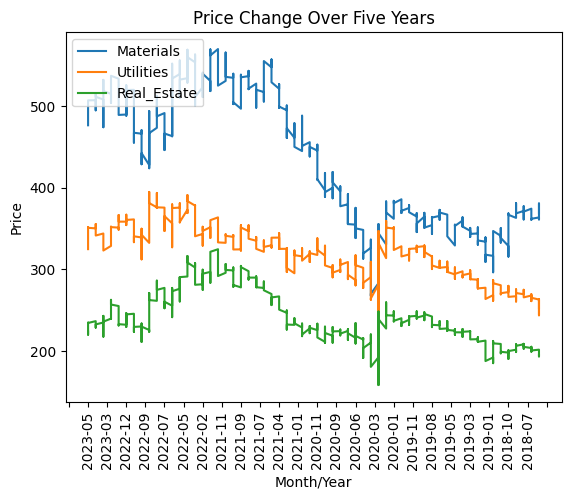

<Figure size 640x480 with 0 Axes>

In [68]:

# Create the figure and axes
fig, ax1 = plt.subplots()

# Plotting the variables on the primary y-axis
ax1.plot(merger_3['Price_mat'], label='Materials')
ax1.plot(merger_3['Price_util'], label='Utilities')
ax1.plot(merger_3['Price'], label='Real_Estate')


# Set the labels and title for the primary y-axis
ax1.set_xlabel('Month/Year')
ax1.set_ylabel('Price')
ax1.set_title('Price Change Over Five Years')

#Sets the amount of ticks shown on the x-axis
ax1.xaxis.set_major_locator(plt.MaxNLocator(27))

# Rotate x-axis labels by 90 degrees
plt.xticks(rotation=90)


# Display the legend for both y-axes
ax1.legend(loc='upper left') 


# Show the plot
plt.show()

#Improves layout and spacing of the plot elements
plt.tight_layout()

In [8]:
sp_materials1['Date'] = sp_materials1['Date'].dt.strftime('%m/%d/%Y')
print(sp_materials1)
#Turns date into a string

            Date   Price    Open    High     Low     Vol. Change %
0     05/31/2023  471.02  473.78  474.90  469.18  142.97M   -1.12%
1     05/30/2023  476.37  479.17  479.32  472.87   80.34M   -0.59%
2     05/26/2023  479.21  479.30  482.37  477.26   70.83M    0.42%
3     05/25/2023  477.22  478.85  479.46  474.69   78.10M   -0.38%
4     05/24/2023  479.04  483.45  483.45  478.16   75.35M   -1.12%
...          ...     ...     ...     ...     ...      ...      ...
2615  01/08/2013  244.34  243.80  244.80  242.57      NaN    0.18%
2616  01/07/2013  243.90  244.09  244.13  242.56      NaN   -0.20%
2617  01/04/2013  244.39  241.82  244.69  241.82   98.22M    1.18%
2618  01/03/2013  241.55  243.18  243.99  240.79  107.44M   -0.68%
2619  01/02/2013  243.21  238.28  244.05  238.28  133.78M    2.35%

[2620 rows x 7 columns]


In [57]:
sp_materials1['year'] = sp_materials1['Date'].dt.year
#Extract the year from the date column and create a new column for the year:

In [58]:
sp_materials1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2620 entries, 0 to 2619
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Date      2620 non-null   datetime64[ns]
 1   Price     2620 non-null   float64       
 2   Open      2620 non-null   float64       
 3   High      2620 non-null   float64       
 4   Low       2620 non-null   float64       
 5   Vol.      998 non-null    object        
 6   Change %  2620 non-null   object        
 7   year      2620 non-null   int32         
dtypes: datetime64[ns](1), float64(4), int32(1), object(2)
memory usage: 153.6+ KB


In [59]:
sp_materials1['Vol.'] = sp_materials1['Vol.'].str.replace('[^\d.]', '', regex=True).astype(float)

In [60]:
sp_materials1['Change %'] = sp_materials1['Change %'].str.replace('%', '').astype(float)

In [61]:
sp_materials1_year = sp_materials1.groupby('year').mean()
sp_materials1_year.tail()
#Group the dataframe by the 'year' column and calculate the average for each year:

,Date,Price,Open,High,Low,Vol.,Change %
year,,,,,,,
2019,2019-07-02 09:02:51.428571392,355.638611,355.449643,357.560278,353.402341,81.424710,0.083373
2020,2020-07-02 12:42:41.264822016,374.356403,374.421502,377.955059,370.708103,93.345731,0.095217
2021,2021-07-04 06:09:57.628458496,517.155771,517.152332,520.552292,513.578024,81.639127,0.094190
2022,2022-07-02 15:13:44.096385536,503.678193,503.887550,508.429036,498.797510,86.816024,-0.048313
2023,2023-03-17 17:56:30.291262208,505.276117,505.126214,508.702524,501.144660,77.980680,-0.030485


In [62]:
sp_materials1_year.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11 entries, 2013 to 2023
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Date      11 non-null     datetime64[ns]
 1   Price     11 non-null     float64       
 2   Open      11 non-null     float64       
 3   High      11 non-null     float64       
 4   Low       11 non-null     float64       
 5   Vol.      6 non-null      float64       
 6   Change %  11 non-null     float64       
dtypes: datetime64[ns](1), float64(6)
memory usage: 660.0 bytes


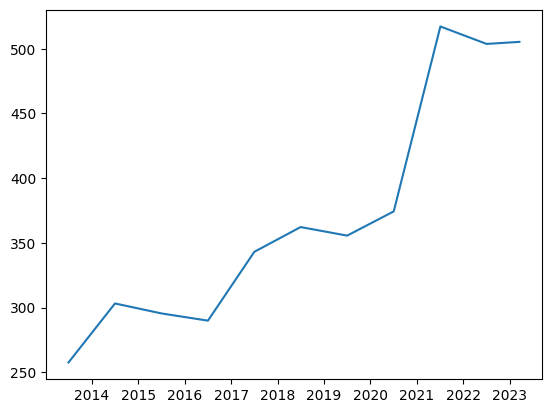

In [63]:
plt.plot(sp_materials1_year['Date'], sp_materials1_year['Price'])

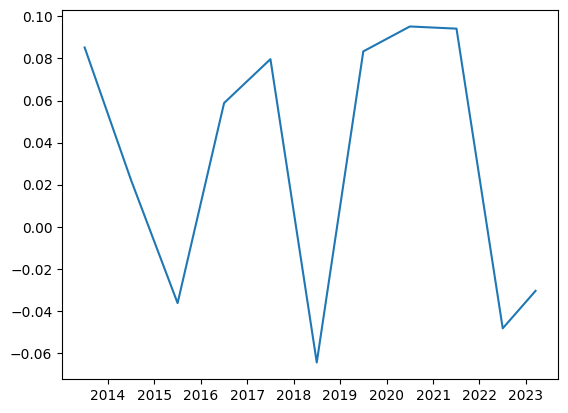

In [64]:
plt.plot(sp_materials1_year['Date'], sp_materials1_year['Change %'])

In [19]:
sp_utilities1 = sp_utilities

In [20]:
sp_utilities1['Date'] = pd.to_datetime(sp_utilities1['Date'], format='%m/%d/%Y')

In [21]:
sp_utilities1['year'] = sp_utilities1['Date'].dt.year

In [22]:
sp_utilities1['Vol.'] = sp_utilities1['Vol.'].str.replace('[^\d.]', '', regex=True).astype(float)

In [23]:
sp_utilities1['Change %'] = sp_utilities1['Change %'].str.replace('%', '').astype(float)

In [24]:
sp_utilities1_year = sp_utilities1.groupby('year').mean()
sp_utilities1_year.head()

,Date,Price,Open,High,Low,Vol.,Change %
year,,,,,,,
2013,2013-07-02 11:02:51.428571392,193.257738,193.168810,194.210833,192.133135,74.81,0.036468
2014,2014-07-02 19:31:25.714285824,215.114405,214.932778,216.308849,213.779087,NaN,0.090238
2015,2015-07-03 06:45:42.857142784,223.339524,223.399444,224.954762,221.742857,NaN,-0.028611
2016,2016-07-02 16:51:25.714285824,245.894683,245.733373,247.259325,244.059405,NaN,0.050635
2017,2017-07-02 07:21:45.179282944,267.138327,267.018805,268.189243,265.804343,NaN,0.033904


In [25]:
sp_utilities1_year.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11 entries, 2013 to 2023
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Date      11 non-null     datetime64[ns]
 1   Price     11 non-null     float64       
 2   Open      11 non-null     float64       
 3   High      11 non-null     float64       
 4   Low       11 non-null     float64       
 5   Vol.      6 non-null      float64       
 6   Change %  11 non-null     float64       
dtypes: datetime64[ns](1), float64(6)
memory usage: 660.0 bytes


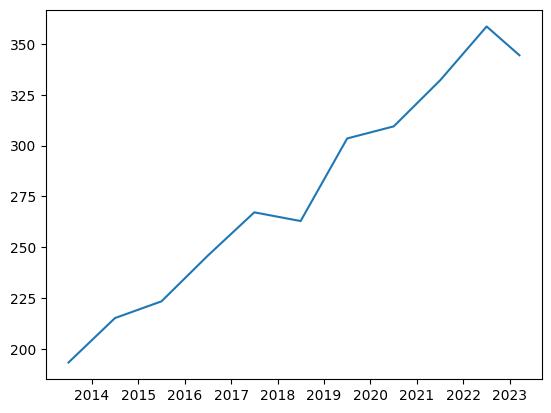

In [26]:
plt.plot(sp_utilities1_year['Date'], sp_utilities1_year['Price'])

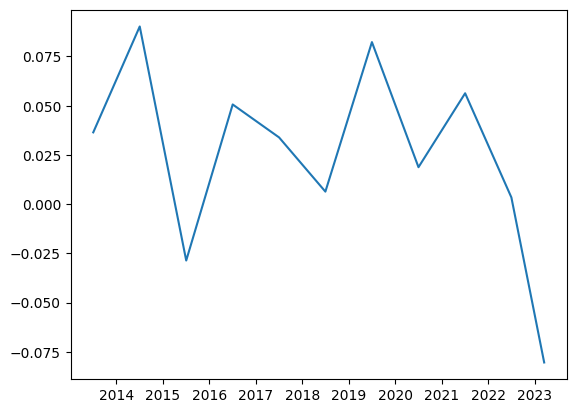

In [27]:
plt.plot(sp_utilities1_year['Date'], sp_utilities1_year['Change %'])

In [28]:
sp_real_estate1 = sp_real_estate

In [29]:
sp_real_estate1['Date'] = pd.to_datetime(sp_real_estate1['Date'], format='%m/%d/%Y')

In [30]:
sp_real_estate1['year'] = sp_real_estate1['Date'].dt.year

In [31]:
sp_real_estate1['Vol.'] = sp_real_estate1['Vol.'].str.replace('[^\d.]', '', regex=True).astype(float)

In [32]:
sp_real_estate1['Change %'] = sp_real_estate1['Change %'].str.replace('%', '').astype(float)

In [33]:
sp_real_estate1_year = sp_real_estate1.groupby('year').mean()
sp_real_estate1_year.head()

,Date,Price,Open,High,Low,Vol.,Change %
year,,,,,,,
2013,2013-07-02 11:02:51.428571392,156.165992,156.181865,157.085913,155.154524,37.756667,-0.000913
2014,2014-07-02 19:31:25.714285824,168.865079,168.708175,169.561389,167.967817,NaN,0.094484
2015,2015-07-03 06:45:42.857142784,186.431944,186.437183,187.615238,185.252063,NaN,0.010754
2016,2016-07-02 16:51:25.714285824,193.472302,193.473849,194.614127,192.157222,NaN,0.005357
2017,2017-07-02 07:21:45.179282944,198.599522,198.574741,199.412470,197.660757,NaN,0.029681


In [34]:
sp_real_estate1_year.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11 entries, 2013 to 2023
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Date      11 non-null     datetime64[ns]
 1   Price     11 non-null     float64       
 2   Open      11 non-null     float64       
 3   High      11 non-null     float64       
 4   Low       11 non-null     float64       
 5   Vol.      6 non-null      float64       
 6   Change %  11 non-null     float64       
dtypes: datetime64[ns](1), float64(6)
memory usage: 660.0 bytes


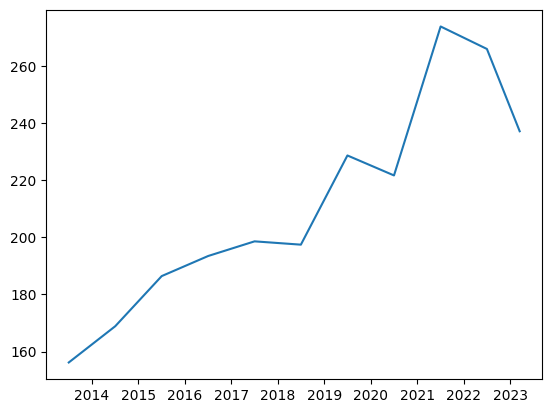

In [35]:
plt.plot(sp_real_estate1_year['Date'], sp_real_estate1_year['Price'])

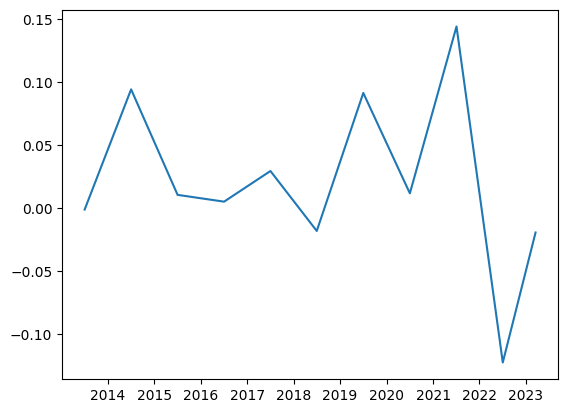

In [36]:
plt.plot(sp_real_estate1_year['Date'], sp_real_estate1_year['Change %'])

In [38]:
sp_materials2 = sp_materials1.drop('Date', axis=1)

<Axes: >

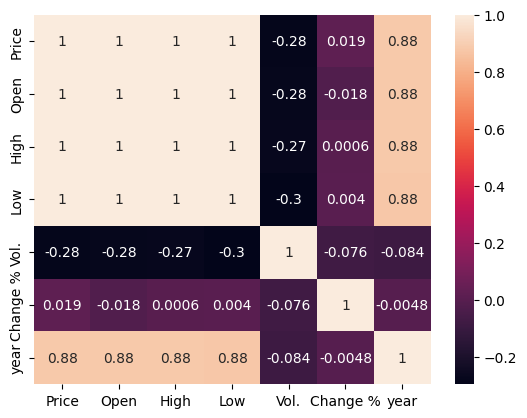

In [39]:
sns.heatmap(sp_materials2.corr(), annot=True)

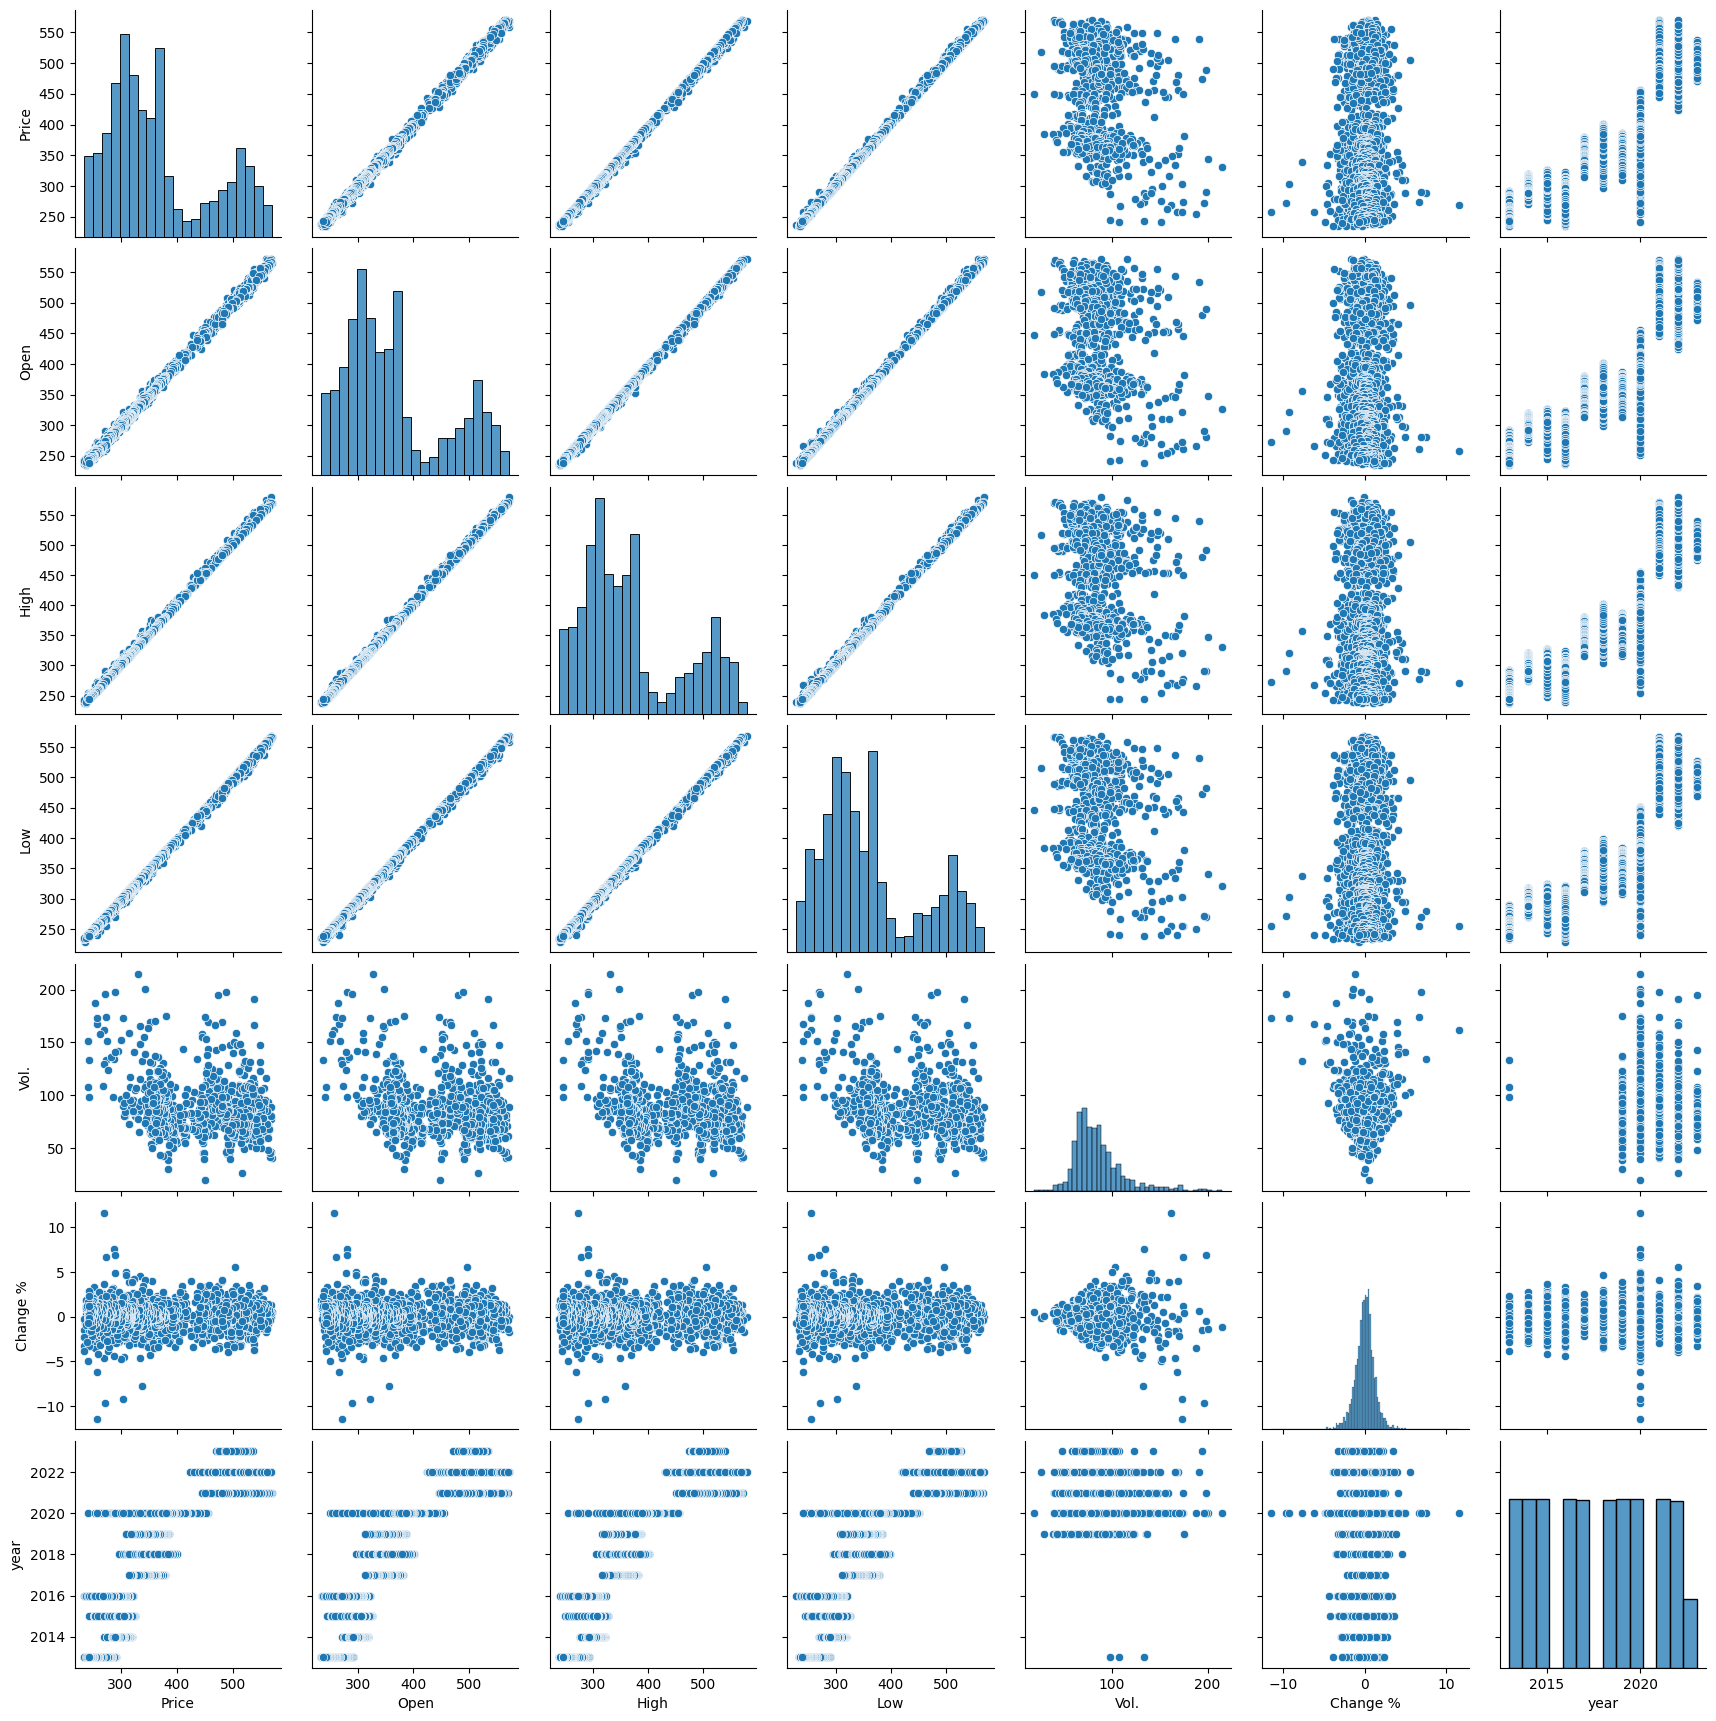

In [40]:
sns.pairplot(sp_materials2)

**Will need to run a dependent t-test, and run correlation tests to see what variable are related to one another. Will also need to run an analysis on the variable types, and if any data needs to be changed.
Also need to create some histograms and scatterplots to see how data correlates to one another. Run analysis's to see which variables correlate to other variables, and do cleaning with that analysis. Need to change the date in the datasets to be able to use it. Change type of variables from string to integers. Try Hot Deck Imputation or add NA for missing variables. Rename the x-axis to show progress over time. Seperate date and check by year on a histogram for the variables.**